In [43]:
#import library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Reading the sales_data csv file, loading the dataset.
df = pd.read_excel("C:/Ai/Group Project Data-SFD Data-Toronto Police (1).xlsx")
df2 = df[['OCC_DOY', 'OCC_YEAR', 'OCC_MONTH', 'DEATH', 'INJURIES','HOOD_158', 'NEIGHBOURHOOD_158']]
df2['The total of Death and Injuries'] = df2['DEATH'] + df2['INJURIES']
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   OCC_DOY                          5707 non-null   int64 
 1   OCC_YEAR                         5707 non-null   int64 
 2   OCC_MONTH                        5707 non-null   object
 3   DEATH                            5707 non-null   int64 
 4   INJURIES                         5707 non-null   int64 
 5   HOOD_158                         5707 non-null   object
 6   NEIGHBOURHOOD_158                5707 non-null   object
 7   The total of Death and Injuries  5707 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 356.8+ KB


C:\Users\hechu\AppData\Local\Temp\ipykernel_41172\1287236448.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['The total of Death and Injuries'] = df2['DEATH'] + df2['INJURIES']


In [147]:
df3=df2.groupby(['OCC_YEAR']).size().reset_index(name = 'Total_counts')
df3=df3.merge(df2.groupby('OCC_YEAR')['The total of Death and Injuries'].agg('sum').reset_index())
df3


,OCC_YEAR,Total_counts,The total of Death and Injuries
0,2004,191,122
1,2005,262,231
2,2006,215,202
3,2007,207,173
4,2008,238,208
5,2009,252,181
6,2010,259,170
7,2011,227,141
8,2012,219,148
9,2013,204,141


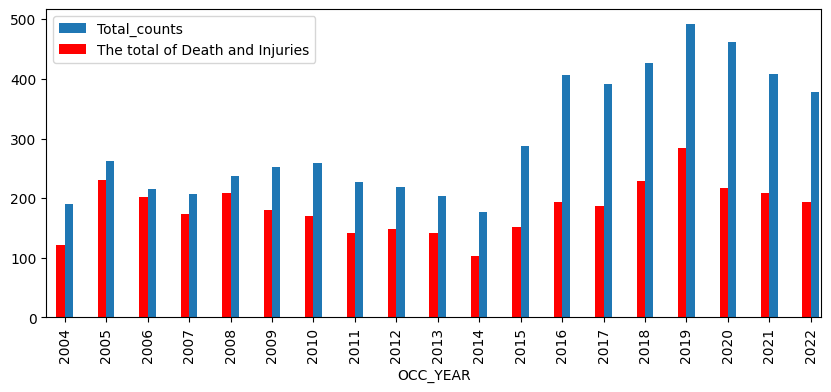

In [155]:
fig, ax = plt.subplots(figsize=(10, 4))
df3.plot.bar(
    x = 'OCC_YEAR',
    y = 'Total_counts',
    ax=ax, 
    position=0,
    width = 0.2
)
df3.plot.bar(
    x = 'OCC_YEAR',
    y = 'The total of Death and Injuries',
    ax=ax, 
    position=1,
    color='red',
    width = 0.2
)
plt.show()

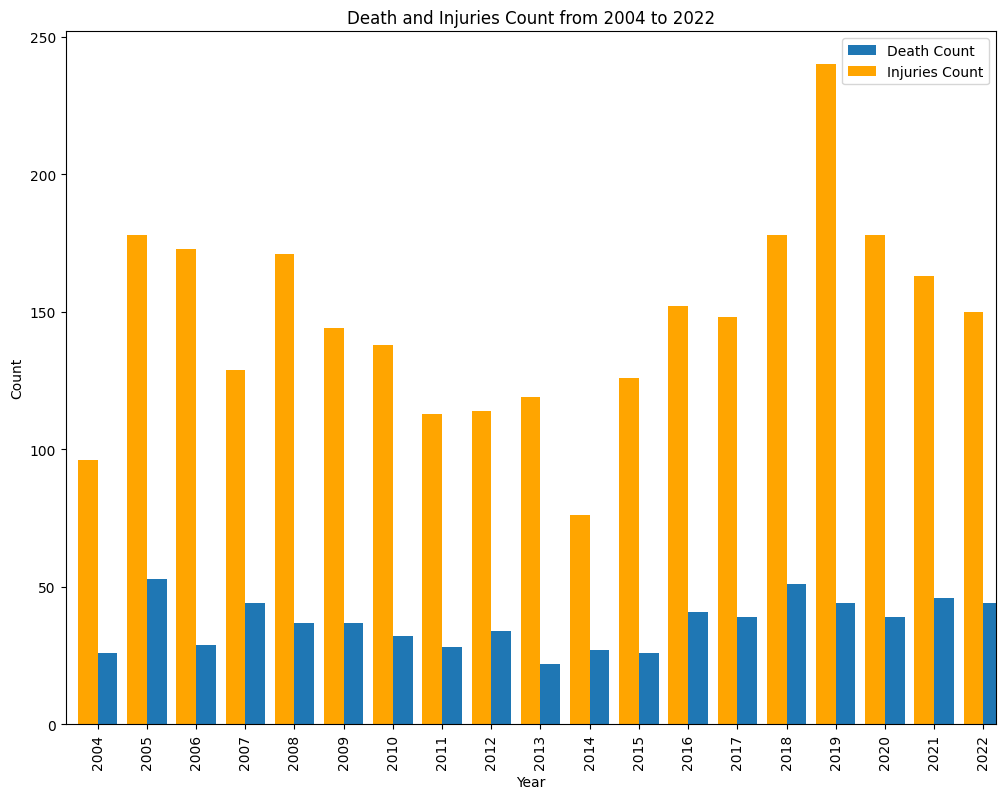

In [156]:
death_count = df.groupby('OCC_YEAR')['DEATH'].sum().head(20)
#print(death_count)
injuries_count = df.groupby('OCC_YEAR')['INJURIES'].sum().head(20)
#print(injuries_count)
fig, ax = plt.subplots(figsize=(12, 9))

death_count = death_count.plot(kind='bar', ax=ax, width=0.4, position=0, label='Death Count')

injuries_coun = injuries_count.plot(kind='bar', ax=ax, width = 0.4, position=1, color='orange', label='Injuries Count')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Death and Injuries Count from 2004 to 2022')

ax.legend()
plt.show()
